# Escalamiento de datos numéricos

### Transformaciones lineales

In [7]:
import timeit
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model

X, y = datasets.load_diabetes(return_X_y=True)
raw = X[:, None, 2]

Detalles del dataset: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html

In [4]:
# escalamiento max-min
max_raw = max(raw)
min_raw = min(raw)
scaled = (2*raw - max_raw -min_raw)/(max_raw - min_raw)

(array([32., 66., 98., 90., 64., 50., 23., 12.,  5.,  2.]),
 array([-1.89792941, -1.34956464, -0.80119987, -0.2528351 ,  0.29552967,
         0.84389444,  1.39225921,  1.94062398,  2.48898875,  3.03735352,
         3.58571828]),
 <BarContainer object of 10 artists>)

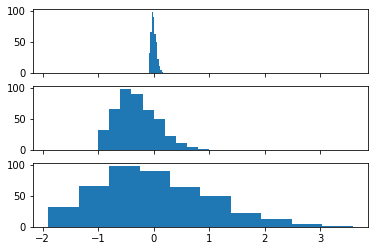

In [16]:


# normalización Z-score
avg = np.average(raw)
std = np.std(raw)
z_scaled = (raw - avg)/std

fig, axs = plt.subplots(3, 1, sharex=True)

axs[0].hist(raw)
axs[1].hist(scaled)
axs[2].hist(z_scaled)

In [17]:
# modelos para entrenamiento
def train_raw():
    linear_model.LinearRegression().fit(raw, y)

def train_scaled():
    linear_model.LinearRegression().fit(scaled, y)

def train_z_scaled():
    linear_model.LinearRegression().fit(z_scaled, y)

In [18]:
raw_time = timeit.timeit(train_raw, number = 100)
scaled_time = timeit.timeit(train_scaled, number = 100)
z_scaled_time = timeit.timeit(train_raw, number = 100)
print('trainning time for raw data : {} '.format(raw_time))
print('trainning time for scaled data : {}'.format(scaled_time))
print('trainning time for z_scaled data : {}'.format(z_scaled_time))

trainning time for raw data : 0.07295639999995274 
trainning time for scaled data : 0.05375950000006924
trainning time for z_scaled data : 0.042158599999993385


* max-min scaling: mejor para datos uniformemente distribuidos
* z-score scaling: mejor para datos distribuidos "normalmente" (forma de campana de gauss)

Utilidades de Scikit Learn : https://scikit-learn.org/stable/modules/preprocessing.html

### Transformaciones no lineales

In [20]:
df = pd.read_csv('../database/cars.csv')

<AxesSubplot:>

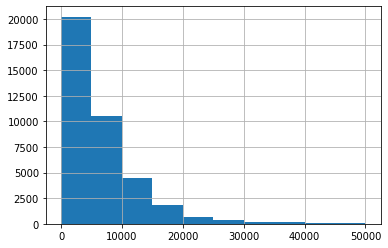

In [22]:
df.price_usd.hist()

Transformación con $$tanh(x)$$

<AxesSubplot:>

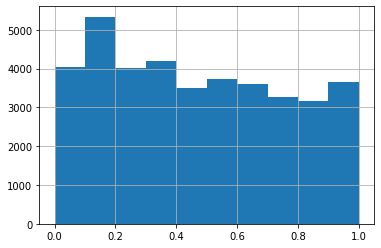

In [27]:
p = 10000
df.price_usd.apply(lambda x: np.tanh(x/p)).hist()

* mapear datos a una distribucion gaussiana: https://scikit-learn.org/stable/auto_examples/preprocessing/plot_map_data_to_normal.html#sphx-glr-auto-examples-preprocessing-plot-map-data-to-normal-py